<a href="https://colab.research.google.com/github/MuhaddidAlavi/Predict-International-Airline-Passengers/blob/main/AirLine_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=4000, batch_size=2, verbose=2)

Streaming output truncated to the last 5000 lines.
46/46 - 0s - loss: 415.6285
Epoch 1502/4000
46/46 - 0s - loss: 429.0134
Epoch 1503/4000
46/46 - 0s - loss: 408.1902
Epoch 1504/4000
46/46 - 0s - loss: 417.7789
Epoch 1505/4000
46/46 - 0s - loss: 424.5451
Epoch 1506/4000
46/46 - 0s - loss: 436.3458
Epoch 1507/4000
46/46 - 0s - loss: 430.9438
Epoch 1508/4000
46/46 - 0s - loss: 404.5392
Epoch 1509/4000
46/46 - 0s - loss: 401.0842
Epoch 1510/4000
46/46 - 0s - loss: 410.1035
Epoch 1511/4000
46/46 - 0s - loss: 419.2859
Epoch 1512/4000
46/46 - 0s - loss: 439.3369
Epoch 1513/4000
46/46 - 0s - loss: 404.9747
Epoch 1514/4000
46/46 - 0s - loss: 405.8540
Epoch 1515/4000
46/46 - 0s - loss: 412.2498
Epoch 1516/4000
46/46 - 0s - loss: 418.0201
Epoch 1517/4000
46/46 - 0s - loss: 417.6642
Epoch 1518/4000
46/46 - 0s - loss: 410.8359
Epoch 1519/4000
46/46 - 0s - loss: 420.8873
Epoch 1520/4000
46/46 - 0s - loss: 425.7077
Epoch 1521/4000
46/46 - 0s - loss: 409.6662
Epoch 1522/4000
46/46 - 0s - loss: 412.65

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 406.66 MSE (20.17 RMSE)
Test Score: 2560.99 MSE (50.61 RMSE)


In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

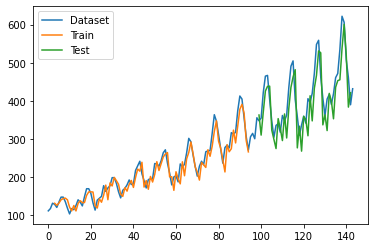

In [ ]:
# plot baseline and predictions
plt.plot(dataset,label='Dataset')
plt.plot(trainPredictPlot,label='Train')
plt.plot(testPredictPlot,label='Test')
plt.legend()
plt.show()